## Optimal building level

Through this notebook we will look for the optimal building level according to our assumptions.

It may be required to get some information as: 

- Cumulative building levels $Bl$ : Sum of levels of each building in the game
- Retail price $Rp$ : price at which the product you're about to produce will be sold at 
- Total Inputs price$In$ : sum of the units*prices required to produce the product
- Factory wages$Fw$ : The cost of running the factory per hour, per level (No admin overhead assumed yet) 
- Produced units$Pu$ : Amount of units produced in one hour in a lvl1 building. 
- Productivity bonus$Pb$ : '%' of extra production (it could have been gotten by stars, parks and recreation buildings, or robots) 
- Executives skill bonus$Sk$ : Cumulative skill of the executives $Sk = COO + \frac{CMO + CFO + CTO}{4}$

The expected profit $P$ is given by the function: 

$$ P = \big{(} Rp - In - \frac{Bl (1-Sk) Fw}{170 Pu (1 + Pb)} \big{)} Bl $$

Note:

The daily profit could be gotten by multiplying $24* P * Pu$

The 'optimal' building level is given when:

$$ \frac{\partial P}{\partial Bl} = 0$$

Solving: 

$$ Bl^{*} = \big{(} \frac{(Rp - In) Pu (1 + Pb)}{Fw} - 1 \big{)} \frac{170}{2 (1 - Sk)}  $$

### Building costs

Additional to the Optimal profit, there is another variable; the cost of upgrading at a certain building level.

The costs for upgrading a building ($Cb$) are given the following way:
  
if $C$ is the cost of upgrading a lvl 1 building, then every upgrade can be expressed as:

- Lvl 1: C
- Lvl 2: C
- Lvl 3: 2C
- Lvl 4: 3C
- Lvl 5: 4C
- ... 

Then the building cost of 1 slot until level "$Lvl$" could be expressed as $1+\frac{1+(Lvl-1)}{2}(Lvl-1))$

Since we pretend to build the total amount of buildings evenly (more efficient), then the total Building Costs $Tc$ can be aproximated as a function of the total building levels $Bl$ (as defined previously), the building slots $Sl$, and the unitary costs of upgrading $C$ (since this formula requires discrete numbers it is only exact when the ratio between $Bl$ and $Sl$ is an integer, otherwise it is just an approximation):

$Tc = \big{[}1+\frac{1+(\frac{Bl}{Sl}-1)}{2}(\frac{Bl}{Sl}-1)) \big{]} C Sl $


### Numerical approximations

For this exercise we are assuming the production of rocket engines. and therefore comparing between the use of robots or the absense of them. 

- $Pu = 0.28$
- $Fw = 620$
- $Rp = 11500$
- $In = 7500$
- $Pb = 0.04$ or $0.07$ with robots
- $Sk = 0.30$
- $Bl = ?$ 

So we are playing with the building level as the main variable 

In [53]:
# %matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from mpl_interactions import ipyplot as iplt

def Bl(Rp, In, Pu, Pb, Fw, Sk):
    # Building level
    return ((Rp - In)*Pu*(1+Pb)/Fw -1)*170/(2*(1-Sk))

def P(Bl, Rp, In, Pu, Pb, Fw, Sk):
    # Profit
    W = Fw/(Pu*(1+Pb))
    P = (Rp - In - (Bl/170*(1-Sk) + 1)*W) * Bl
    return  P * 24 * Pu # To find daily profit

def P_star(*args):
    # Optimal Profit
    # P(Bl(Rp, In, Pu, Pb, Fw, Sk),Rp, In, Pu, Pb, Fw, Sk) equivalent:
    return (P(Bl(*args), *args))

def BuildingCost(Bl, Sl, C):
    #Building costs
    sing = lambda x: 1+((1+(x-1))/2*(x-1)) #For one simple building at lvl; x
    return sing(Bl/Sl)*C*Sl #For many buildings at lvl; Bl/Sl

def OptimalBuildingCosts(Bl_star, *args):
    return BuildingCost(Bl_star, *args)

In [54]:
# Optimal solution with no robots: 
    
Pu = 0.28
Pb = 0.04 # No robots
Fw = 620
Rp = 11500
In = 7600
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Bl(Rp, In, Pu, Pb, Fw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Fw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Bl(Rp, In, Pu, Pb, Fw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 100.99723502304148
Profit at optimal building level: 600949.0864232542
Building costs of optimal building level: 37256735.76288437


In [55]:
# Optimal solution with robots: 
    
Pu = 0.28
Pb = 0.07 # Robots
Fw = 620
Rp = 11500
In = 7600
Sk = 0.3

slots = 13
UnitaryBuildingCost = 105000

print("Optimal Building Level: {}".format(Bl(Rp, In, Pu, Pb, Fw, Sk)))
print("Profit at optimal building level: {}".format(P_star(Rp, In, Pu, Pb, Fw, Sk)))
print("Building costs of optimal building level: {}".format(OptimalBuildingCosts(Bl(Rp, In, Pu, Pb, Fw, Sk), slots, UnitaryBuildingCost)))

Optimal Building Level: 107.41336405529954
Profit at optimal building level: 660670.4902708993
Building costs of optimal building level: 42320076.52771266


So having robots increases the building levels by a 7%, and the income by a 10%.
Even though, installing robots requires a big investment; The price of the robots + the building upgrades:

$ 186*930*12 + 5M = 7.3M $

So we should be investing 7.3M  more to get an increase of 60k daily.

In [ ]:
# Doesn't work yet

Bls =np.linspace(0,200,200)
fig, ax = plt.subplots()
# controls = iplt.plot(Bls, P , Rp=Rp, In=In, Pu=Pu, Pb=(0,0.1), Fw=Fw, Sk=(0,0.6))
plt.plot(P(Bls, Rp, In, Pu, 0.04, Fw, Sk), label = 'No Robots')
plt.plot(P(Bls, Rp, In, Pu, 0.07, Fw, Sk), label = 'Robots')
plt.title('Optimal Building level')
plt.xlabel('Level')
plt.ylabel('Daily Profit')
plt.legend()
plt.show();

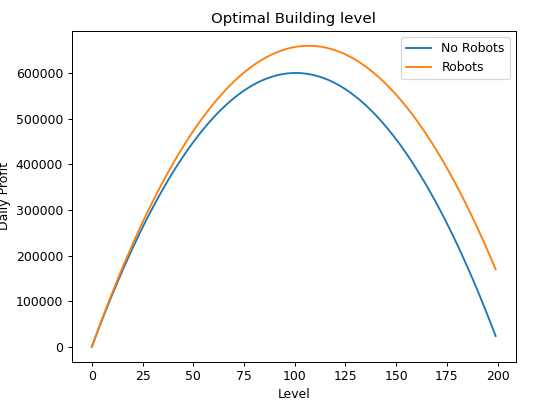